# The Shor’s Algorithm


In [ ]:
!pip install qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 8.9 MB/s eta 0:00:00


In [ ]:
!pip install -U qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 24.8 MB/s eta 0:00:00


In [ ]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=ad5f2068962c16457a0020684080ddf849d6ba8b78e689313e2840632d0dbe7e
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [ ]:
!pip install qiskit_ibm_runtime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.4/317.4 kB 13.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 10.6 MB/s eta 0:00:00
  Created wheel for ibm-platform-services: filename=ibm_platform_services-0.53.0-py3-none-any.whl size=333407 sha256=242eae2cadee00a15b229681e314c9763370dc6bd146771dd606caf1b87ec9b1
  Stored in directory: /root/.cache/pip/wheels/51/4d/71/afa07c4b9ac1d2f59b37ae0f1c86f3f90046ccd75fb274de2f
  Created wheel for ibm-cloud-sdk

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# !rm -rf "/content/drive/MyDrive/BTP/Output/Shor_Normal_Constant"
!mkdir -p "/content/drive/MyDrive/BTP/Output/Shor_Normal_Constant"
dir = "/content/drive/MyDrive/BTP/Output/Shor_Normal_Constant/"

## Factorise 15

In [ ]:
# Imporing important libraries
import numpy as np
import math
from decimal import *
import matplotlib.pyplot as plt
from datetime import datetime
from math import gcd
import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile, assemble
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import pandas as pd
from fractions import Fraction
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from qiskit_aer.noise import (
    NoiseModel,
    QuantumError,
    ReadoutError,
    depolarizing_error,
    pauli_error,
    thermal_relaxation_error,
    amplitude_damping_error
)
from qiskit_ibm_runtime.fake_provider import FakeGuadalupeV2
from qiskit.quantum_info import state_fidelity

In [ ]:
def mod(A,N):
    getcontext().prec = 27
    return round((Decimal(A)/Decimal(N) - Decimal(A)//Decimal(N)) * N)

In [ ]:
# Optimised Constant Normal Exponentiation by MOD
# Optimised a ^ p modular exponentiation, applies a specific sequence of Swap and X Gates to return the value of a ^ p mod N
def constant_optimized_modular_exponentation_modulus15(a, p):
    if a not in [2,4,7,8,11,13]:
        raise ValueError("'a' must be 2,4,7,8,11 or 13")
    U = QuantumCircuit(4)
    for iteration in range(p):
        if a in [2,13]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if a in [7,8]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a == 11:
            U.swap(1,3)
            U.swap(0,2)
        if a in [7,11,13]:
            for q in range(4):
                U.x(q)
    U = U.to_gate()
    U.name = "%i^%i mod 15" % (a, p)
    control_U = U.control()
    return control_U

In [ ]:
def inverse_qft(n):
    circuit = QuantumCircuit(n)
    for i in range(n//2):
        circuit.swap(i, n-1-i)
    for j in range(n):
        for m in range(j):
            circuit.cp(-np.pi/float(2**(j-m)), m, j)
        circuit.h(j)
    circuit.name = "QFT†"
    return circuit

In [ ]:
N = 15
a = 7
n_count = 8

In [ ]:
counting_register = QuantumRegister(size = n_count, name = "counting_register")
acting_register = QuantumRegister(size = 4, name="acting_register")
classic_register = ClassicalRegister(size = n_count, name="classic_register")
qc = QuantumCircuit(counting_register, acting_register ,classic_register)

In [ ]:
initial_state = [1,0]
for q in range(8):
    qc.initialize(initial_state, q)

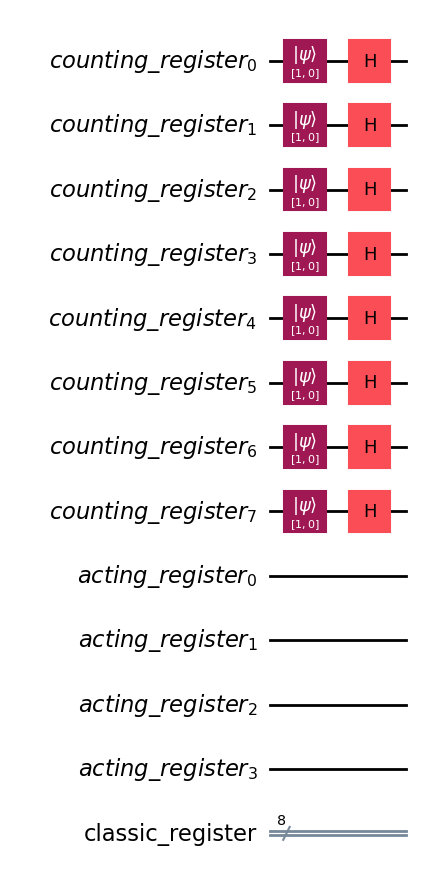

In [ ]:
for q in range(n_count):
    qc.h(q)
qc.draw(output = 'mpl', filename = dir+"Step1.png")


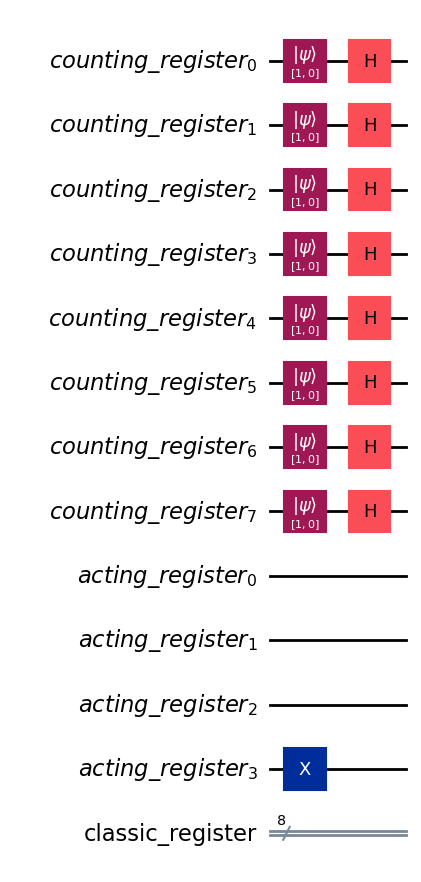

In [ ]:
qc.x(3+n_count)
qc.draw(output = 'mpl', filename = dir+"Step1b.png")
for q in range(n_count):
    qc.append(constant_optimized_modular_exponentation_modulus15(a, 2**q),
             [q] + [i+n_count for i in range(4)])

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=12, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(8, 'counting_register'), 0), Qubit(QuantumRegister(8, 'counting_register'), 1), Qubit(QuantumRegister(8, 'counting_register'), 2), Qubit(QuantumRegister(8, 'counting_register'), 3), Qubit(QuantumRegister(8, 'counting_register'), 4), Qubit(QuantumRegister(8, 'counting_register'), 5), Qubit(QuantumRegister(8, 'counting_register'), 6), Qubit(QuantumRegister(8, 'counting_register'), 7), Qubit(QuantumRegister(4, 'acting_register'), 0), Qubit(QuantumRegister(4, 'acting_register'), 1), Qubit(QuantumRegister(4, 'acting_register'), 2), Qubit(QuantumRegister(4, 'acting_register'), 3)), clbits=())

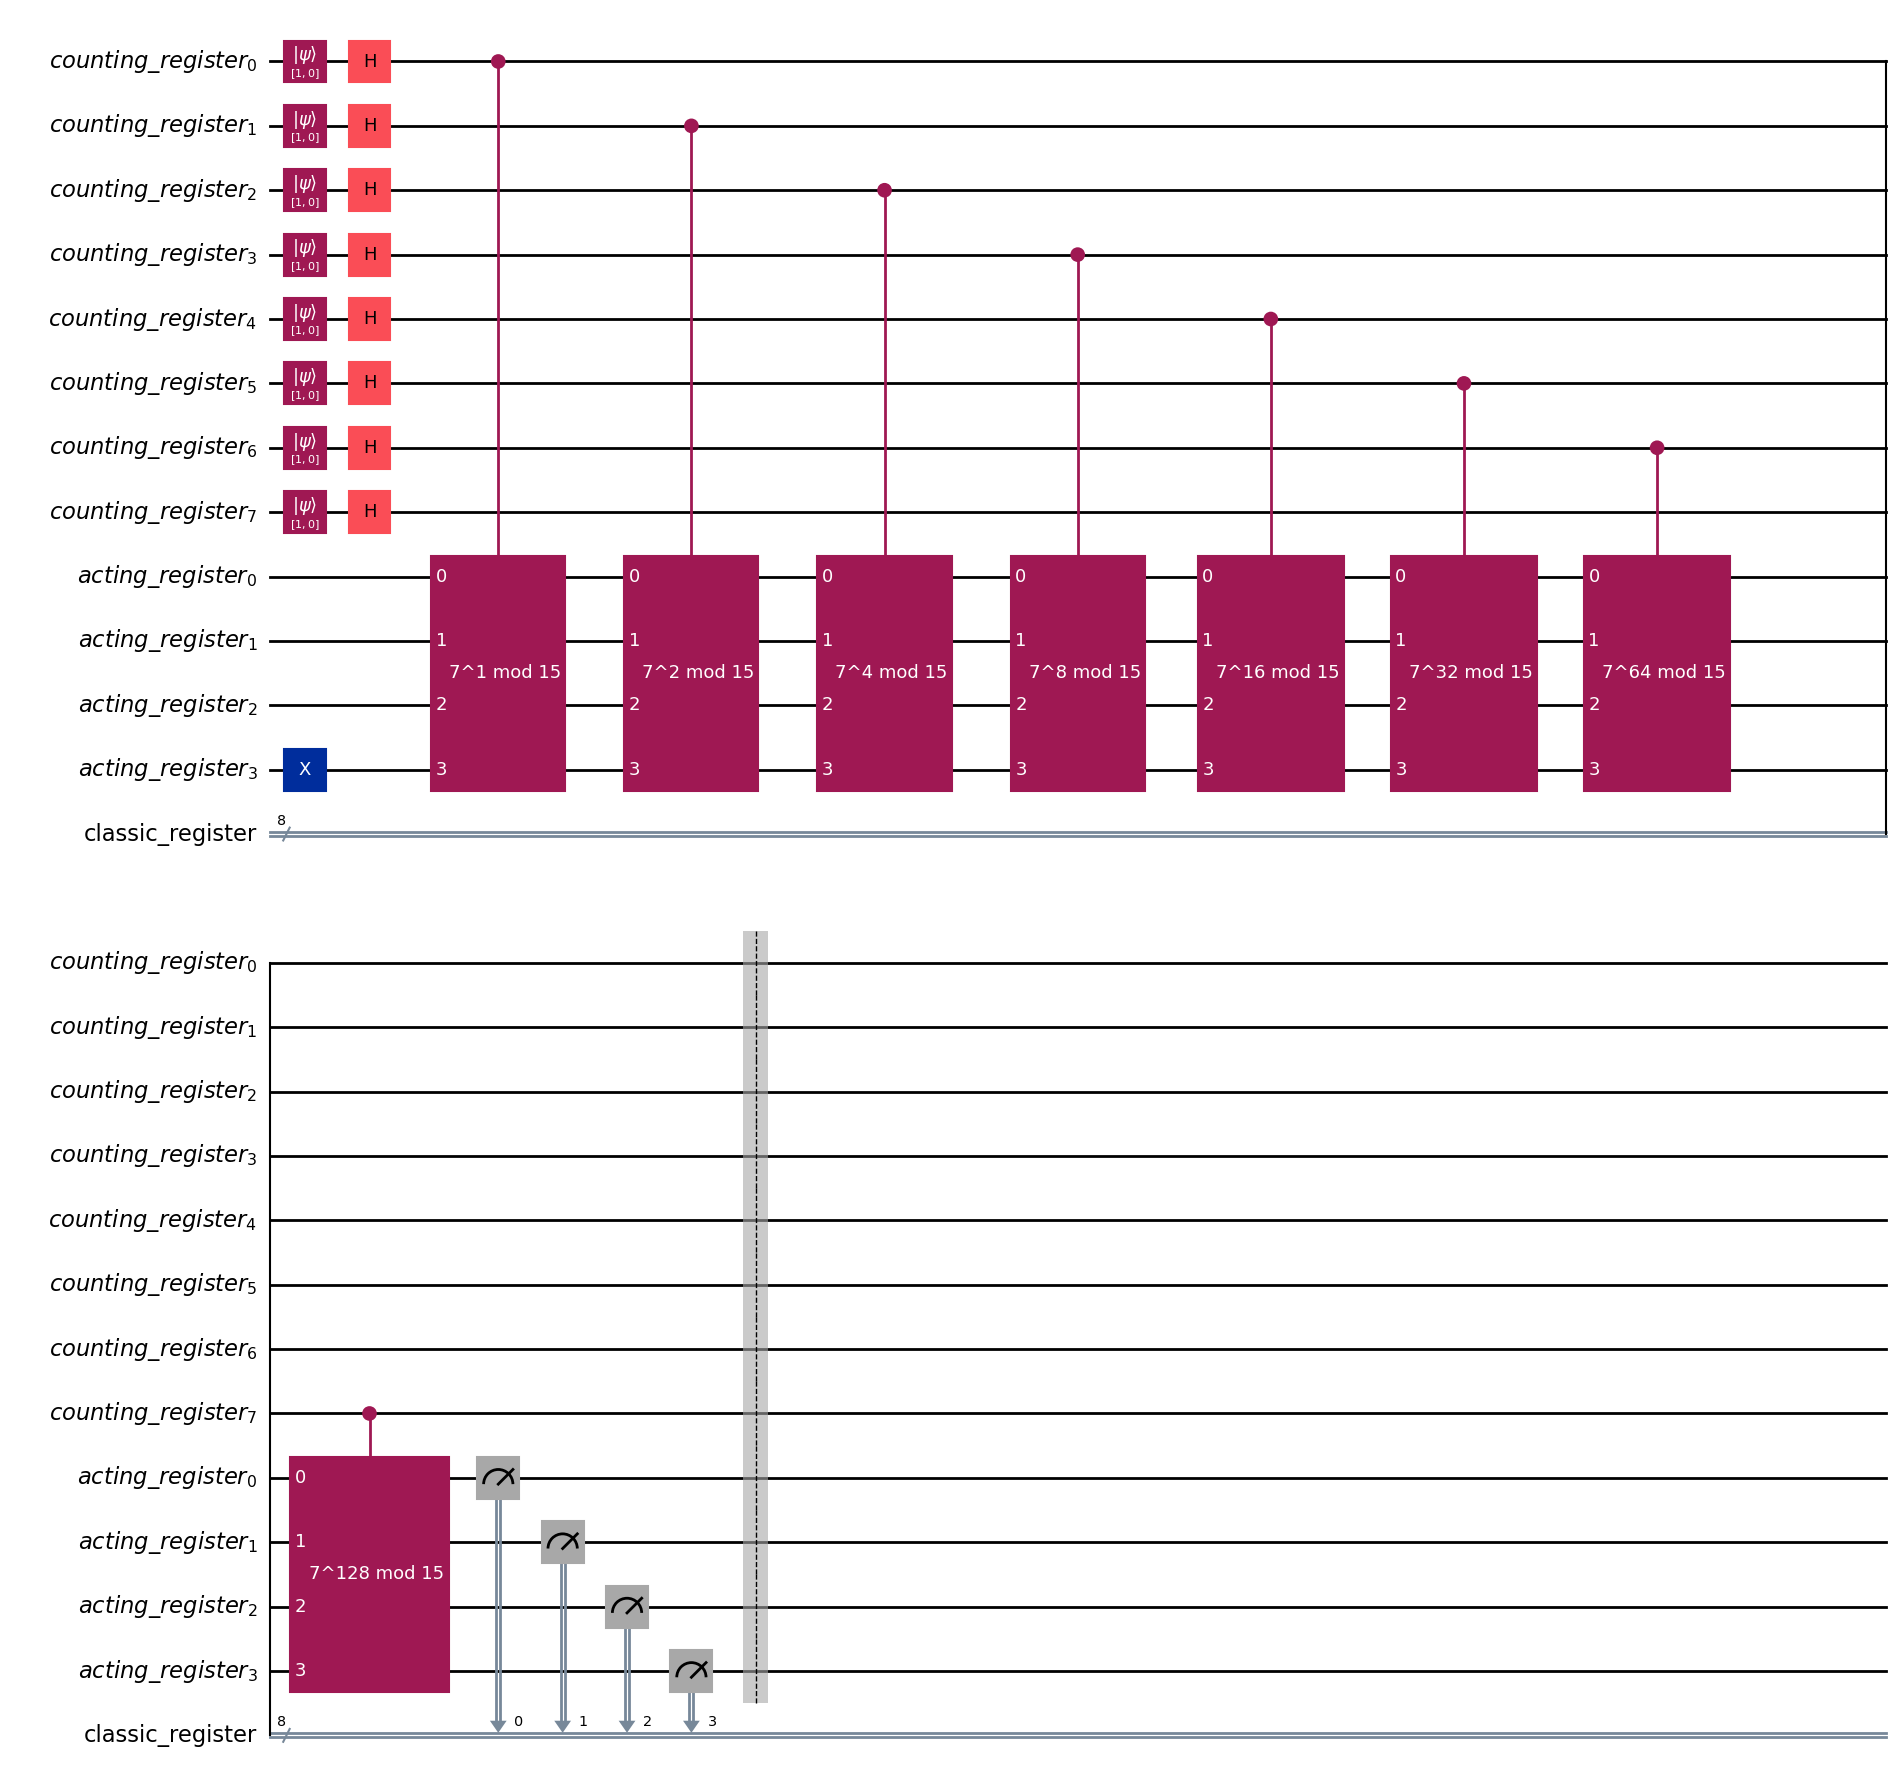

In [ ]:
qc.measure(range(n_count,n_count + 4), range(4))
qc.barrier()
qc.draw(output = 'mpl', filename = dir+"Step2.png")

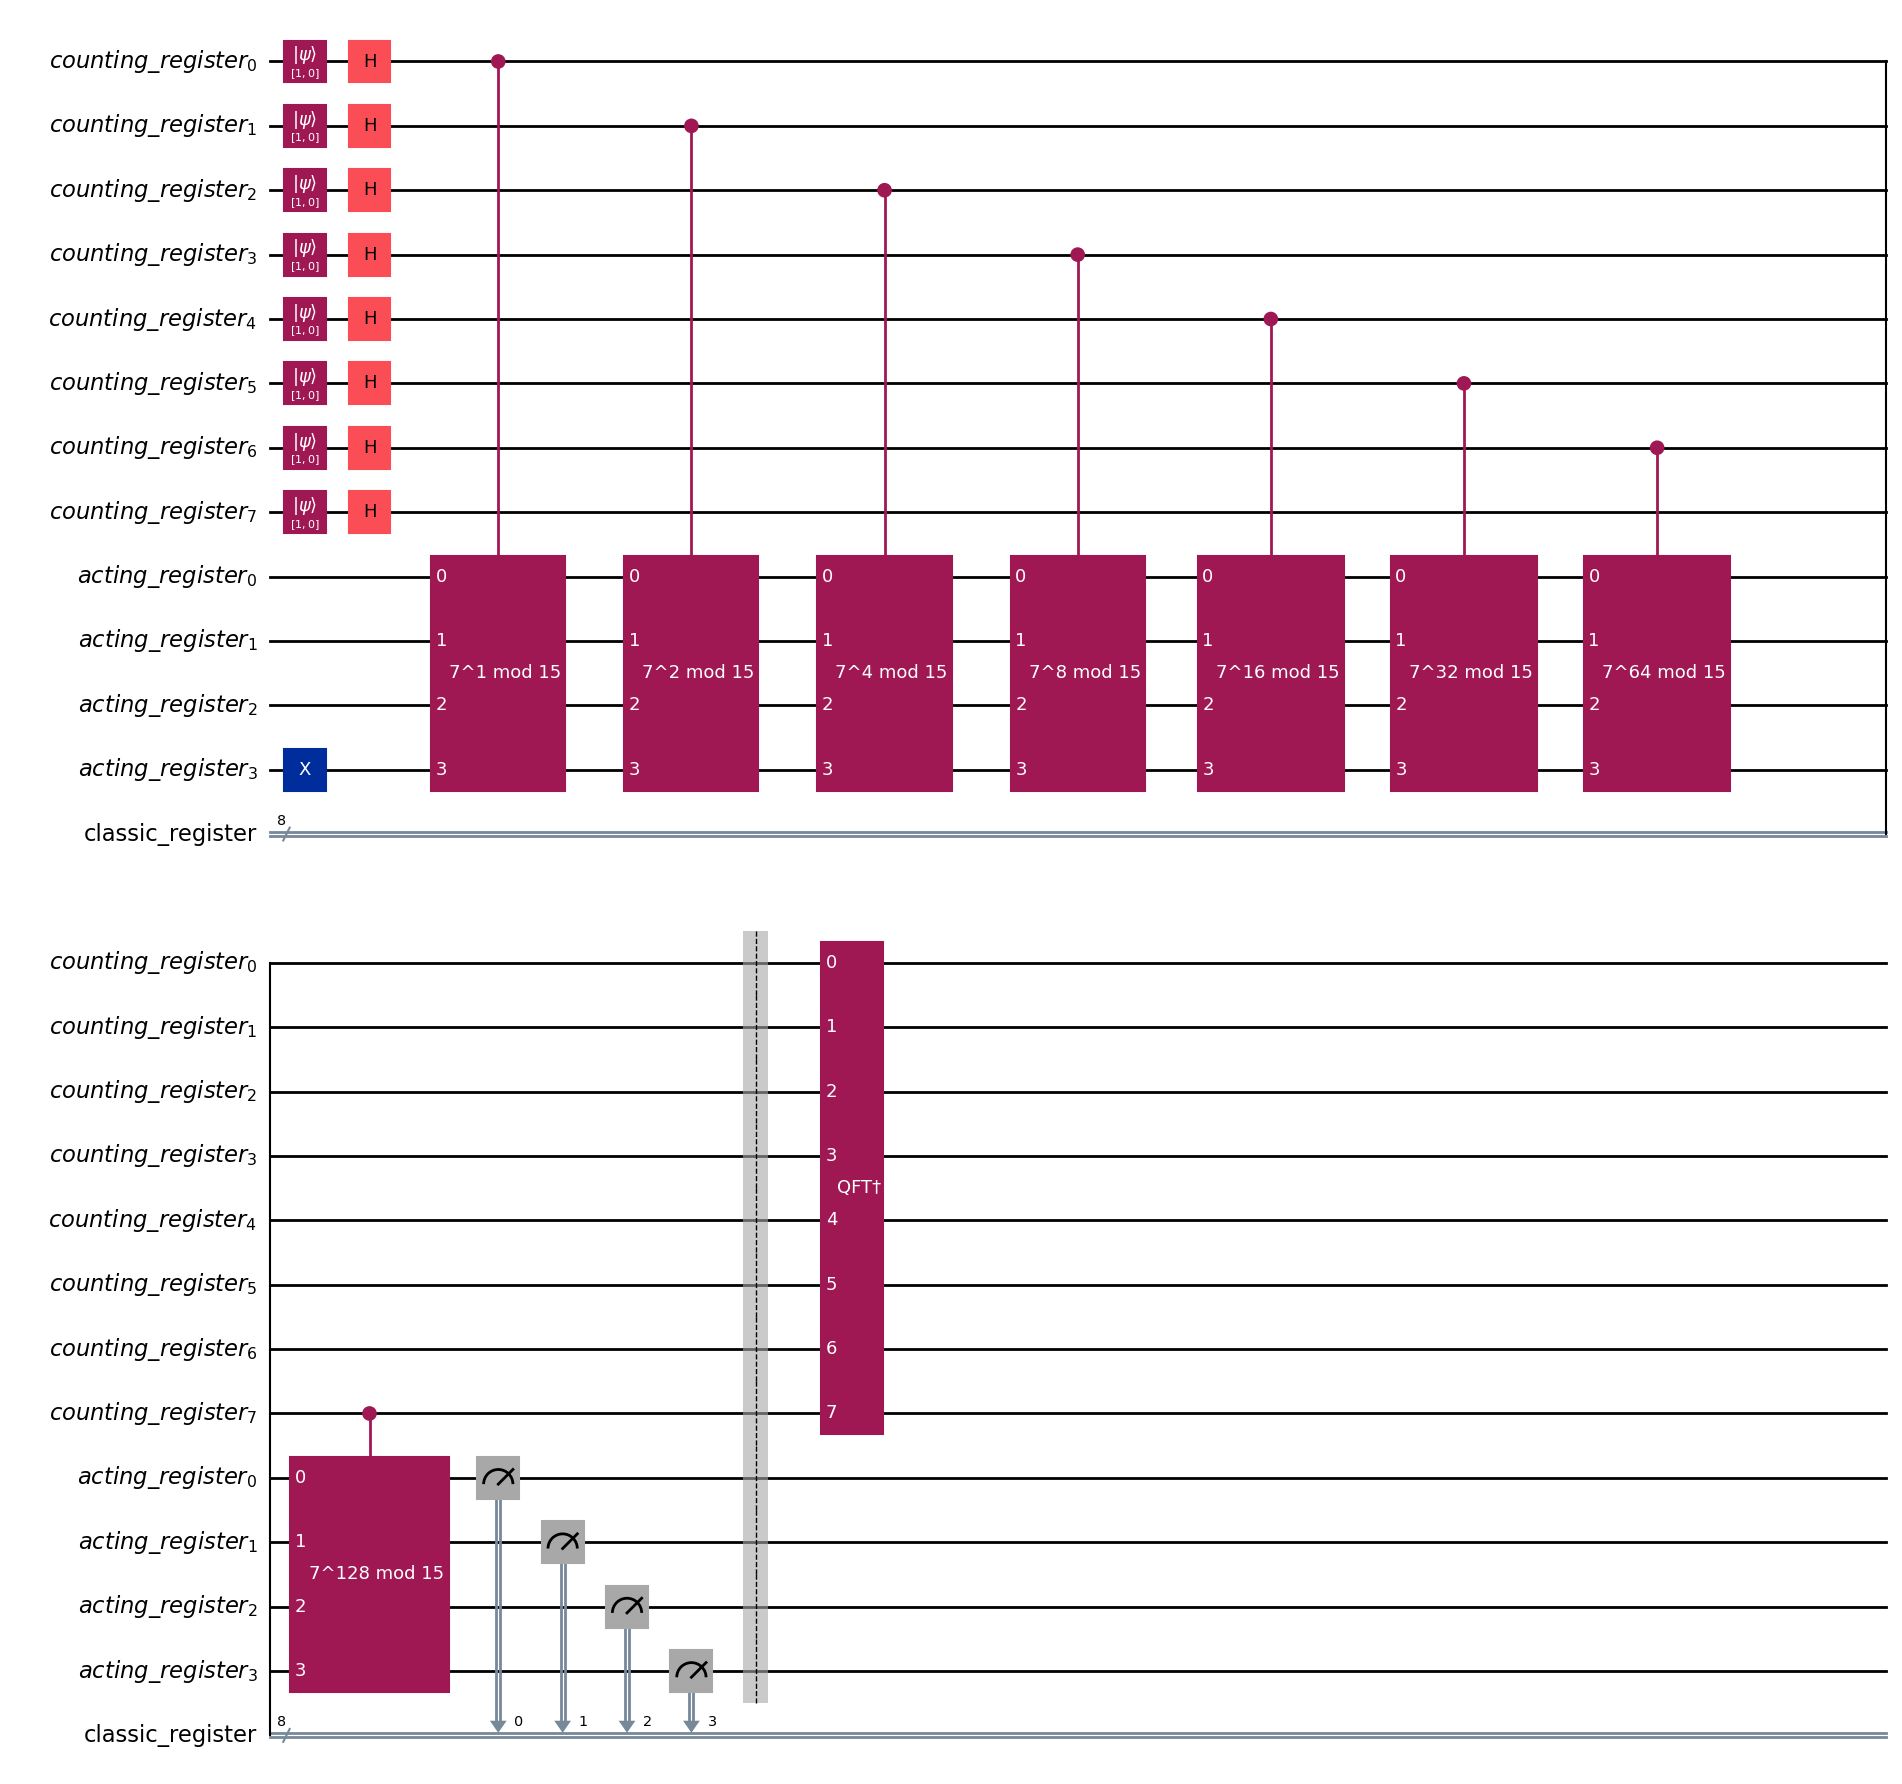

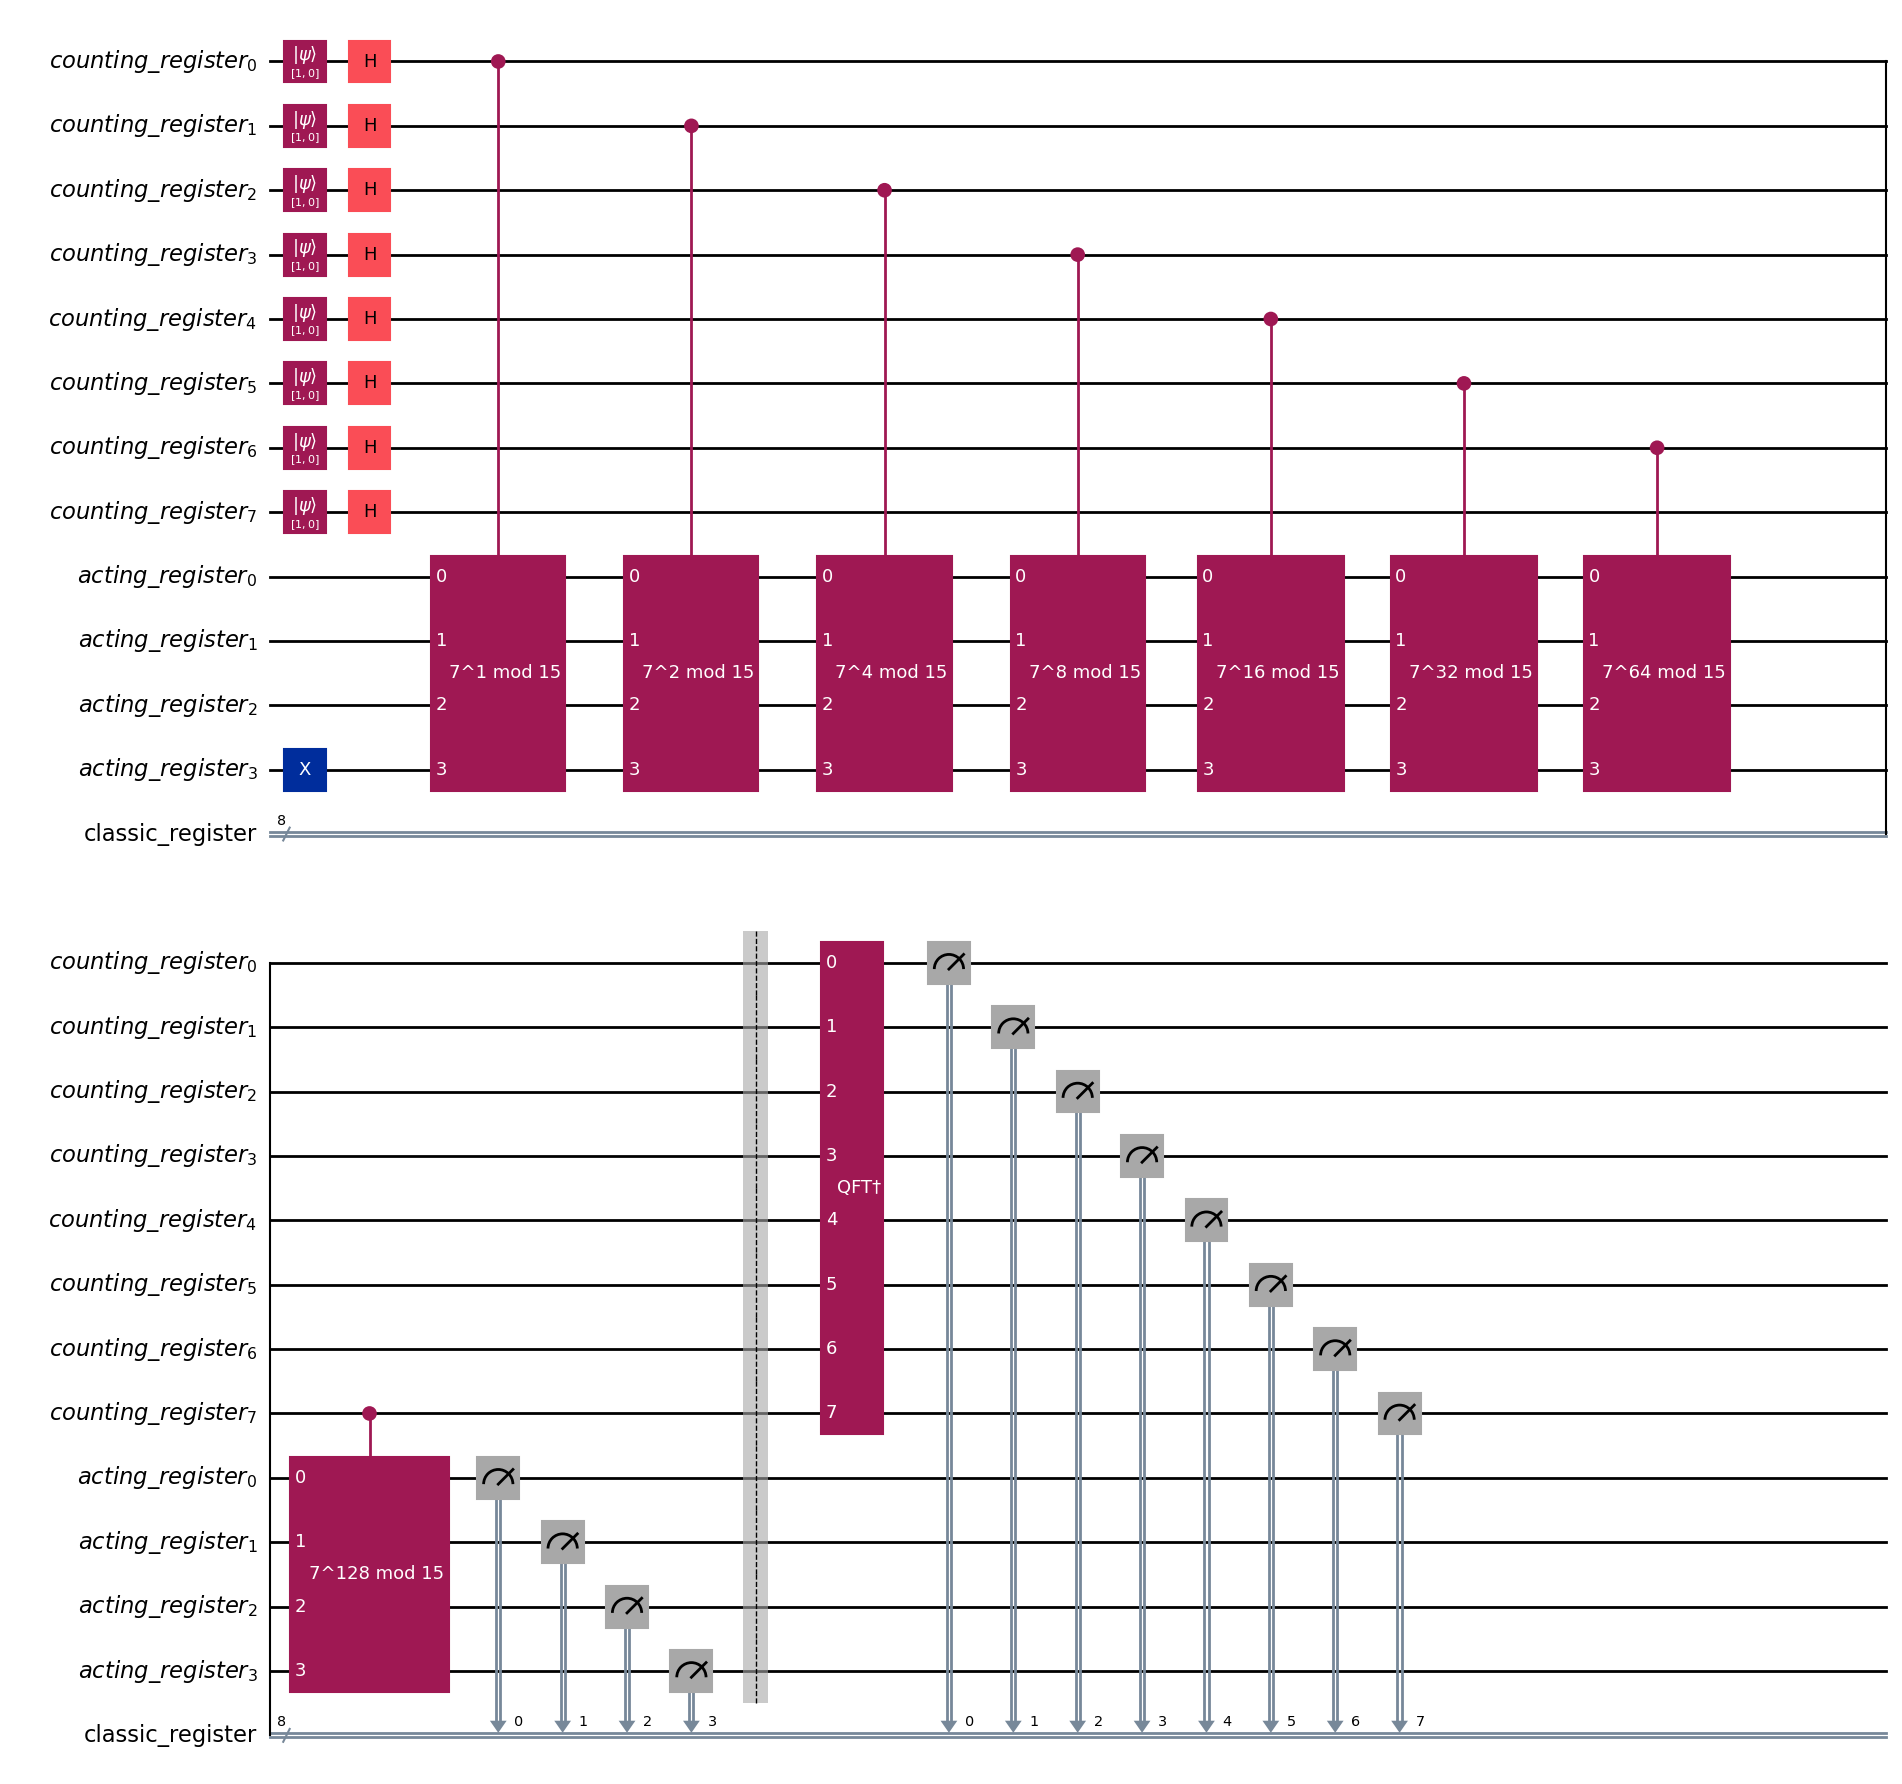

In [ ]:
qc.append(inverse_qft(n_count), range(n_count))
qc.draw(output = 'mpl', filename = dir+"Step3.png")
# Measure circuit
qc.measure(range(n_count), range(n_count))
qc.draw(output = 'mpl', filename = dir+"Step4.png")

In [ ]:
qasm_sim = Aer.get_backend('qasm_simulator')
t_qc = transpile(qc, qasm_sim)
qobj = assemble(t_qc)
results = qasm_sim.run(qobj).result()
counts = results.get_counts()

<ipython-input-18-ad764d2c66e2>:4: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.14 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  results = qasm_sim.run(qobj).result()


<Figure size 1000x600 with 0 Axes>

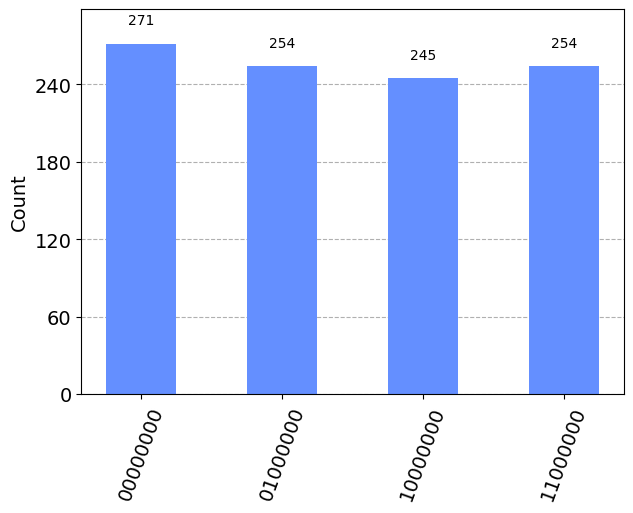

<Figure size 1000x600 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 6))
plot_histogram(counts, bar_labels=True, filename = dir+"Histogram_non_noise.png")
plot_histogram(counts, bar_labels=True)

In [ ]:
# continued fractions algorithm
rows, measured_phases = [], []
for output in counts:
    decimal = int(output, 2)
    phase = decimal/(2**n_count)
    measured_phases.append(phase)
    rows.append([f"{output}(bin) = {decimal:>3}(dec)",
                 f"{decimal}/{2**n_count} = {phase:.2f}"])
headers=["Register Output", "Phase"]
df = pd.DataFrame(rows, columns=headers)
# Save the DataFrame as a CSV file
df.to_csv(dir + "data_non_noise.csv")
df

,Register Output,Phase
0,10000000(bin) = 128(dec),128/256 = 0.50
1,01000000(bin) = 64(dec),64/256 = 0.25
2,00000000(bin) = 0(dec),0/256 = 0.00
3,11000000(bin) = 192(dec),192/256 = 0.75


In [ ]:
rows = []
for phase in measured_phases:
    frac = Fraction(phase).limit_denominator(15)
    rows.append([phase, f"{frac.numerator}/{frac.denominator}", frac.denominator])

headers=["Phase", "Fraction", "Guess for r"]
df = pd.DataFrame(rows, columns=headers)
my_period_r = max(df["Guess for r"])
print("My period (r) is %i" % my_period_r)

My period (r) is 4


[Text(0.5, 0, '$x$'),
 Text(0, 0.5, '$7^x$ mod $15$'),
 Text(0.5, 1.0, "Example of Periodic Function in Shor's Algorithm")]

Text(4, 1, '')

Text(1.3333333333333333, 1.5, '$r=4$')

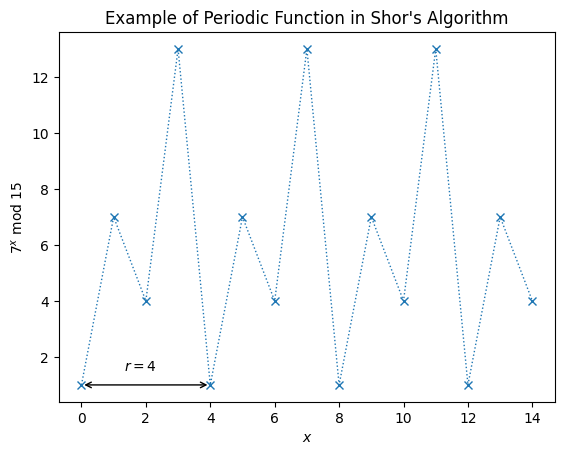

In [ ]:
# Confirm that the period is 4
xvals = np.arange(N)
xvals = [x.item() for x in xvals]
yvals = [mod(a**x, N) for x in xvals]

fig, ax = plt.subplots();
ax.plot(xvals, yvals, linewidth=1, linestyle='dotted', marker='x');
ax.set(xlabel='$x$', ylabel='$%i^x$ mod $%i$' % (a, N),
       title="Example of Periodic Function in Shor's Algorithm");
try:
    r = yvals[1:].index(1) +1
    plt.annotate('', xy=(0,1), xytext=(r,1), arrowprops=dict(arrowstyle='<->'));
    plt.annotate('$r=%i$' % r, xy=(r/3,1.5));
    plt.savefig(dir+"period_non_noise.png")
except ValueError:
    print('Could not find a period')

In [ ]:
first_shared_factor = math.gcd((7**(int(my_period_r/2)) + 1), N)
first_shared_factor
second_shared_factor = math.gcd((7**(int(my_period_r/2)) - 1), N)
second_shared_factor

5

3

# Noise Models on **shor_normal_constant**

In [ ]:
def qpe_amod15(a):
  n_count = 8
  qc = QuantumCircuit(4+n_count, n_count)
  for q in range(n_count):
    qc.h(q) # Initialize counting qubits in state |+>
  qc.x(3+n_count) # And auxiliary register in state |1>
  for q in range(n_count): # Do controlled-U operations
    qc.append(constant_optimized_modular_exponentation_modulus15(a, 2**q), [q] + [i+n_count for i in range(4) ])
  qc.append(inverse_qft(n_count), range(n_count)) # Do inverse-QFT
  qc.measure(range(n_count), range(n_count))
  return qc

In [ ]:
################# Define circuits with different noise models ####################
def run_optimal_circuit(a, shots):
  aer_sim = Aer.get_backend('aer_simulator')
  t_qc = transpile(qpe_amod15(a), aer_sim)
  start = datetime.now()
  result = aer_sim.run(t_qc, memory=True, shots=shots).result()
  runtime = datetime.now() - start
  return result , runtime

In [ ]:
def run_fake_Guadalupe_circuit(a, shots):
  aer_sim = Aer.get_backend('aer_simulator')
  noise_model = NoiseModel().from_backend(FakeGuadalupeV2())
  t_qc = transpile(qpe_amod15(a), aer_sim)
  start = datetime.now()
  result = aer_sim.run(t_qc, memory=True, shots=shots, noise_model=noise_model).result()
  runtime = datetime.now() - start
  return result , runtime

In [ ]:
def run_combined_noise_circuit(a, shots, oneqb_error_prob=0, twoqb_error_prob=0, readout_error_prob=0, t1=0,t2=0):
  aer_sim = Aer.get_backend('aer_simulator')
  noise_model = NoiseModel()
  if oneqb_error_prob != 0:
    noise_model.add_all_qubit_quantum_error(depolarizing_error( oneqb_error_prob, 1), ['x', 'h'])
  if twoqb_error_prob != 0:
    noise_model.add_all_qubit_quantum_error(depolarizing_error( twoqb_error_prob, 2), ['cp', 'swap'])
  if t1 != 0 and t2 != 0:
    noise_model.add_all_qubit_quantum_error( thermal_relaxation_error(t1, t2, 0), ['x', 'h'])
  if readout_error_prob != 0:
    noise_model.add_all_qubit_readout_error(ReadoutError([[1 -readout_error_prob , readout_error_prob], [readout_error_prob , 1 - readout_error_prob]]))
  t_qc = transpile(qpe_amod15(a), aer_sim)
  start = datetime.now()
  result = aer_sim.run(t_qc, memory=True, shots=shots, noise_model= noise_model).result()
  runtime = datetime.now() - start
  return result , runtime

In [ ]:
################# Run quantum circuits and evaluate results ####################
#Evalute if the periodicity from the QPE circuit gets correct factor(s)
def evaluate_attempts(counts, a, N):
  succesful_attempts = 0
  failed_attempts = 0
  for measured_value in counts:
    # Convert the measured_value to phase
    phase = int(measured_value, 2) / (2 ** n_count)
    frac = Fraction(phase).limit_denominator(15)
    s, r = frac.numerator, frac.denominator
    if phase != 0:
      found = False
      guesses = [gcd(a ** (r // 2) - 1, N), gcd(a ** (r // 2) + 1, N)]
      for guess in guesses:
        if guess not in [1, N] and (N % guess) == 0:
          found = True
      if found:
          succesful_attempts += counts[measured_value]
      else:
          failed_attempts += counts[measured_value]
    else:
      failed_attempts += counts[measured_value]
  return succesful_attempts , failed_attempts

In [ ]:
#For storing results
results_list = []
columns = ["Circuit", "Succesful Attempts", "Failed Attempts", "Success Rate", "SSE", "Shots Taken", "Runtime", "Guess of a", "One qubit error Prob", "Two qubit error Prob", "Readout error Prob", "T1", "T2"]

In [ ]:
def append_and_print(results_string , successful_attempts ,failed_attempts, shots, runtime, a, sse=0, oneqb_error_prob=0,twoqb_error_prob=0, readout_error_prob=0, t1=0, t2=0):
  total_seconds = int(runtime.total_seconds())
  milliseconds = int(runtime.microseconds / 1000)
  hours, remainder = divmod(total_seconds, 3600)
  minutes, seconds = divmod(remainder, 60)
  # Format the elapsed time as a string with hours:minutes:seconds: milliseconds format
  formatted_runtime = f"{hours:02d}:{minutes:02d}:{seconds:02d}.{ milliseconds:03d}"
  success_rate = 0 if successful_attempts + failed_attempts == 0 else successful_attempts / (successful_attempts + failed_attempts)
  results_list.append([results_string, successful_attempts, failed_attempts, success_rate, sse, shots, formatted_runtime, a, oneqb_error_prob , twoqb_error_prob , readout_error_prob , t1, t2])

In [ ]:
def handle_results(results_string, results, shots, runtime, a, ideal_results=None, oneqb_error_prob=0, twoqb_error_prob=0, readout_error_prob=0, t1=0, t2=0):
  counts = results.get_counts()
  sse = 0
  ideal_counts = ideal_results.get_counts()
  #Calculate SSE
  for key in ideal_counts:
    ideal_prob = ideal_counts[key] / shots
    noisy_prob = counts.get(key, 0) / shots
    sse += (ideal_prob - noisy_prob) ** 2 * shots
  sse /= len(ideal_counts)
  successful_attempts, failed_attempts = evaluate_attempts(counts, a, N)
  append_and_print(results_string , successful_attempts , failed_attempts, shots, runtime, a, sse, oneqb_error_prob, twoqb_error_prob , readout_error_prob , t1, t2)

In [ ]:
#Define parameters
possible_a = [2,4,7,8,11,13]
error_probs = [0.01, 0.05, 0.1, 0.15]
N = 15
shots = 100000
oneqb_error_prob = 2.385e-4
twoqb_error_prob = 8.369e-3
readout_error_prob = 1.745e-2
t1 = 97.64
t2 = 111.17

In [ ]:
#Run circuits
for a in possible_a:
  print("a = %i" % a)
  print("Running optimal circuit...")
  ideal_results , ideal_runtime = run_optimal_circuit(a,shots)
  handle_results("Optimal Circuit", ideal_results, shots,
  ideal_runtime , a, ideal_results)
  print("Running Guadalupe Circuit...")
  results, runtime = run_fake_Guadalupe_circuit(a,shots)
  handle_results("Guadalupe Circuit", results, shots, runtime, a, ideal_results , -1, -1, -1, -1, -1)
  numerator = 4
  # Oneq + Twoq + Readout + Thermal
  print("Running combined circuit with error probabilities scaled to %f " % (1/numerator))
  results, runtime = run_combined_noise_circuit(a,shots,oneqb_error_prob/numerator, twoqb_error_prob/numerator, readout_error_prob/numerator, t1/numerator, t2/numerator )
  handle_results("Combined error Circuit", results, shots, runtime, a, ideal_results, oneqb_error_prob/numerator, twoqb_error_prob/numerator, readout_error_prob/numerator, t1/ numerator, t2/numerator)
  #Oneq
  print("Running one-qubit errors only circuit with error probabilities scaled to %f" % (1/numerator))
  results, runtime = run_combined_noise_circuit(a,shots, oneqb_error_prob/numerator)
  handle_results("One-qubit errors only Circuit", results, shots, runtime, a, ideal_results, oneqb_error_prob/numerator)
  #Twoq
  print("Running two-qubit errors only circuit with error probabilities scaled to %f" % (1/numerator))
  results, runtime = run_combined_noise_circuit(a,shots, 0, twoqb_error_prob/numerator)
  handle_results("Two-qubit errors only Circuit", results, shots, runtime, a, ideal_results, 0, twoqb_error_prob/numerator)
  #Readout
  print("Running Readout error only circuit with error probabilities scaled to %f" % (1/numerator))
  results, runtime = run_combined_noise_circuit(a,shots, 0, 0, readout_error_prob/numerator)
  handle_results("Readout errors only Circuit", results, shots, runtime, a, ideal_results, 0, 0, readout_error_prob/numerator)
  #Thermal
  print("Running thermal relaxation error only circuit with error probabilities scaled to %f" % (1/numerator))
  results, runtime = run_combined_noise_circuit(a,shots, 0, 0, 0, t1/numerator, t2/numerator)
  handle_results("Thermal Relaxation errors only Circuit", results, shots, runtime, a, ideal_results, 0, 0, 0, t1/numerator, t2/numerator)
  #Oneq + Twoq
  print("Running one-qubit and two-qubit errors circuit with error probabilities scaled to %f" % (1/numerator))
  results, runtime = run_combined_noise_circuit(a,shots, oneqb_error_prob/numerator, twoqb_error_prob/numerator)
  handle_results("One-qubit and two-qubit errors Circuit", results, shots, runtime, a, ideal_results, oneqb_error_prob/ numerator, twoqb_error_prob/numerator)
  #Oneq + Readout
  print("Running one-qubit errors and readout error circuit with error probabilities scaled to %f" % (1/numerator))
  results, runtime = run_combined_noise_circuit(a,shots, oneqb_error_prob/numerator, 0, readout_error_prob/numerator)
  handle_results("One-qubit errors and readout error Circuit", results, shots, runtime, a, ideal_results, oneqb_error_prob/ numerator, 0, readout_error_prob/numerator)
  #Twoq + Readout
  print("Running two-qubit errors and readout error circuit with error probabilities scaled to %f" % (1/numerator))
  results, runtime = run_combined_noise_circuit(a,shots, 0, twoqb_error_prob/numerator, readout_error_prob/numerator)
  handle_results("Two-qubit errors and readout error Circuit", results, shots, runtime, a, ideal_results, 0, twoqb_error_prob/ numerator, readout_error_prob/numerator)
  #Oneq + Thermal
  print("Running one-qubit errors and thermal relaxation error circuit with error probabilities scaled to %f" % (1/numerator))
  results, runtime = run_combined_noise_circuit(a,shots, oneqb_error_prob/numerator, 0, 0, t1/numerator, t2/numerator)
  handle_results("One-qubit errors and thermal relaxation error Circuit", results, shots, runtime, a, ideal_results, oneqb_error_prob/numerator, 0, 0, t1/numerator, t2/numerator)
  #Twoq + Thermal
  print("Running two-qubit errors and thermal relaxation error circuit with error probabilities scaled to %f" % (1/numerator))
  results, runtime = run_combined_noise_circuit(a,shots, 0, twoqb_error_prob/numerator, 0, t1/numerator, t2/numerator)
  handle_results("Two-qubit errors and thermal relaxation error Circuit", results, shots, runtime, a, ideal_results, 0, twoqb_error_prob/numerator, 0, t1/numerator, t2/numerator)
  #Readout + Thermal
  print("Running readout error and thermal relaxation error circuit with error probabilities scaled to %f" % (1/numerator))
  results, runtime = run_combined_noise_circuit(a,shots, 0, 0, readout_error_prob/numerator, t1/numerator, t2/numerator)
  handle_results("Readout error and thermal relaxation error Circuit", results, shots, runtime, a, ideal_results, 0, 0, readout_error_prob/numerator, t1/numerator, t2/numerator)
  #Oneq + Twoq + Readout
  print("Running one-qubit errors, two-qubit errors and readout error circuit with error probabilities scaled to %f" % (1/numerator ))
  results, runtime = run_combined_noise_circuit(a,shots, oneqb_error_prob/numerator, twoqb_error_prob/numerator, readout_error_prob/numerator)
  handle_results("One-qubit errors, two-qubit errors and readout error Circuit", results, shots, runtime, a, ideal_results, oneqb_error_prob/numerator, twoqb_error_prob/numerator, readout_error_prob/numerator)
  #Oneq + Twoq + Thermal
  print("Running one-qubit errors, two-qubit errors and thermal relaxation error circuit with error probabilities scaled to %f" % (1/numerator))
  results, runtime = run_combined_noise_circuit(a,shots, oneqb_error_prob/numerator, twoqb_error_prob/numerator, 0, t1/numerator, t2/numerator)
  handle_results("One-qubit errors, two-qubit errors and thermal relaxation error Circuit", results, shots, runtime, a, ideal_results, oneqb_error_prob/numerator, twoqb_error_prob/ numerator, 0, t1/numerator, t2/numerator)
  #Oneq + Readout + Thermal
  print("Running one-qubit errors, readout error and thermal relaxation error circuit with error probabilities scaled to %f" % (1/numerator))
  results, runtime = run_combined_noise_circuit(a,shots, oneqb_error_prob/numerator, 0, readout_error_prob/numerator, t1/ numerator, t2/numerator)
  handle_results("One-qubit errors, readout error and thermal relaxation error Circuit", results, shots, runtime, a, ideal_results, oneqb_error_prob/numerator, 0, readout_error_prob/ numerator, t1/numerator, t2/numerator)
  #Twoq + Readout + Thermal
  print("Running two-qubit errors, readout error and thermal relaxation error circuit with error probabilities scaled to %f" % (1/numerator))
  results, runtime = run_combined_noise_circuit(a,shots, 0, twoqb_error_prob/numerator, readout_error_prob/numerator, t1/ numerator, t2/numerator)
  handle_results("Two-qubit errors, readout error and thermal relaxation error Circuit", results, shots, runtime, a, ideal_results, 0, twoqb_error_prob/numerator, readout_error_prob/ numerator, t1/numerator, t2/numerator)
  results_df = pd.DataFrame(results_list , columns=columns)
  results_df.to_csv(dir+'noise_normal_constant.csv', index=True)
  print(results_df)

a = 2
Running optimal circuit...
Running Guadalupe Circuit...
Running combined circuit with error probabilities scaled to 0.250000 
Running one-qubit errors only circuit with error probabilities scaled to 0.250000
Running two-qubit errors only circuit with error probabilities scaled to 0.250000
Running Readout error only circuit with error probabilities scaled to 0.250000
Running thermal relaxation error only circuit with error probabilities scaled to 0.250000
Running one-qubit and two-qubit errors circuit with error probabilities scaled to 0.250000
Running one-qubit errors and readout error circuit with error probabilities scaled to 0.250000
Running two-qubit errors and readout error circuit with error probabilities scaled to 0.250000
Running one-qubit errors and thermal relaxation error circuit with error probabilities scaled to 0.250000
Running two-qubit errors and thermal relaxation error circuit with error probabilities scaled to 0.250000
Running readout error and thermal relaxati